In [2]:
!pip install plotly   # for interactive visualizations

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load Dataset

In [4]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# Data Cleaning

In [8]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')  #used format ='mixed' for inconsistent date formats

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Drop duplicates
df.drop_duplicates(inplace = True)

# Visualizations

1. Content Type (Movie vs TV Show)

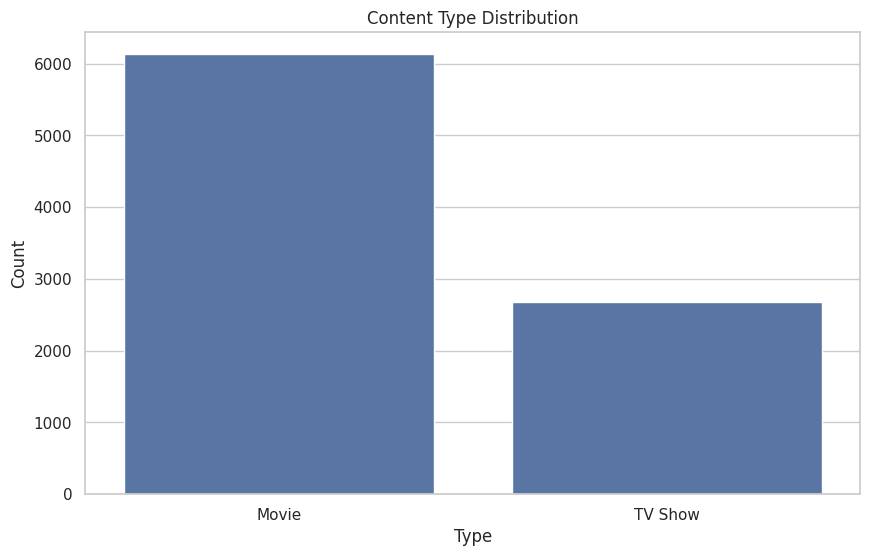

In [9]:
sns.countplot(data = df, x = 'type')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

2. Content Added Per Year

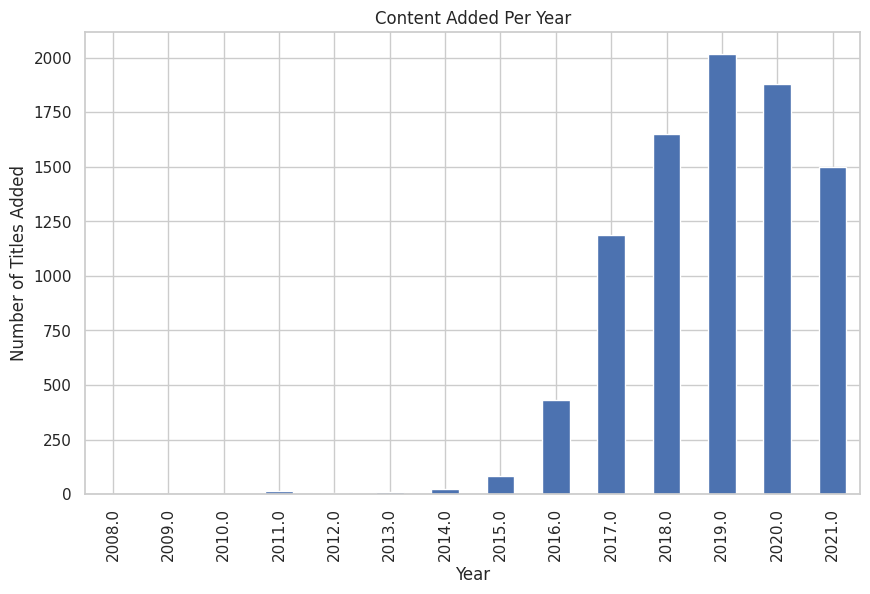

In [10]:
df['year_added'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Content Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

3. Top 10 Countries

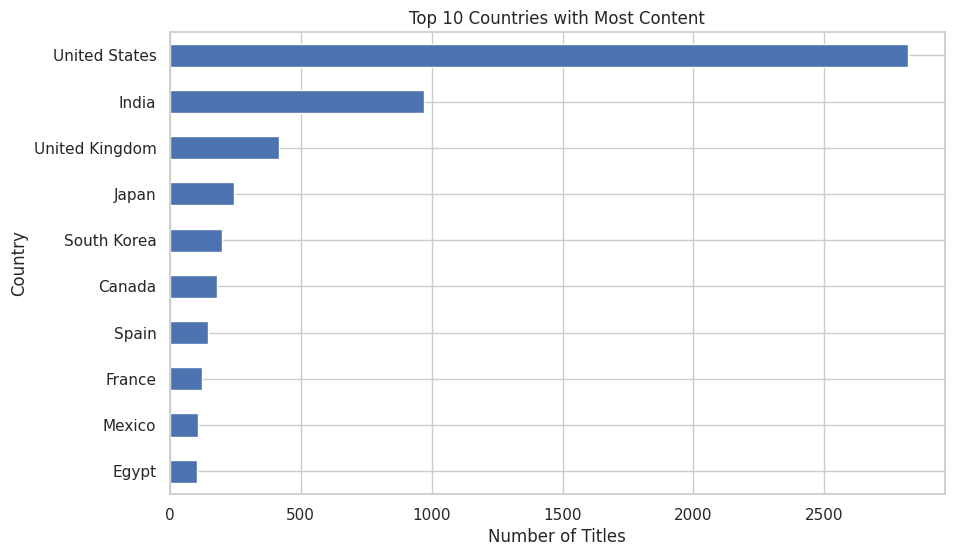

In [11]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind = 'barh')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()     # puts the biggest country at the top.
plt.show()

4. Most Common Ratings

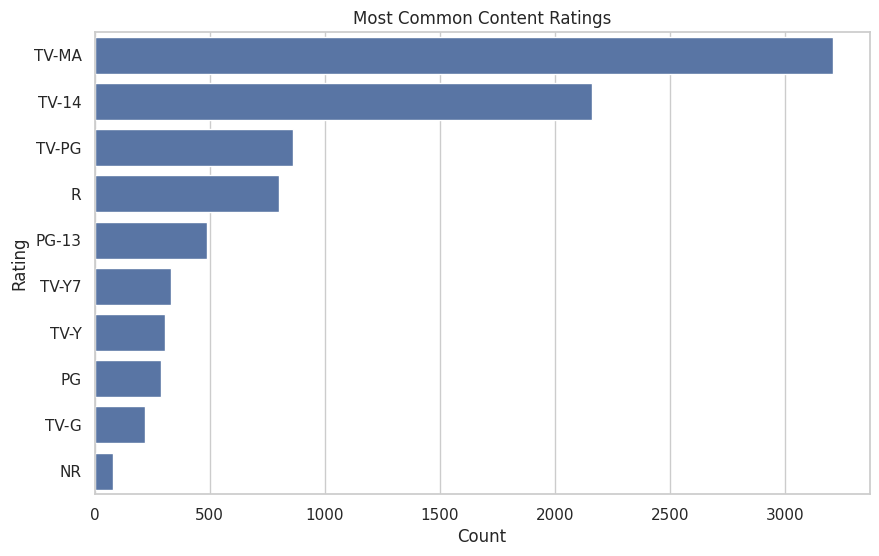

In [12]:
sns.countplot(data = df, y = 'rating', order = df['rating'].value_counts().index[:10])
plt.title('Most Common Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

5. Most Common Genres

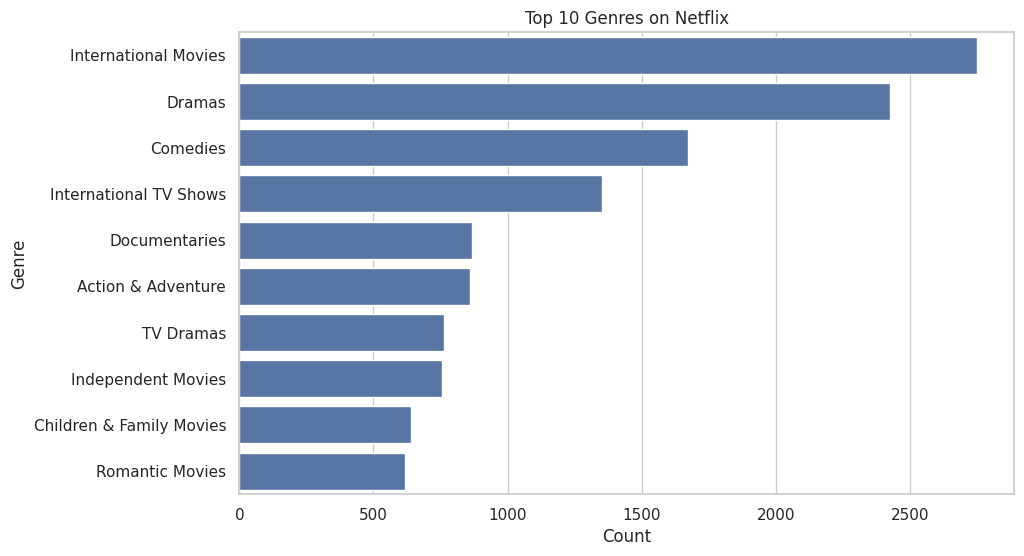

In [13]:
from collections import Counter

# Split genres
genre_list = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]   # Flatten the list of lists into one list
genre_counts = Counter(flat_genres)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.most_common(10), columns = ['Genre', 'Count'])

# Plot
sns.barplot(x = 'Count', y = 'Genre', data = genre_df)
plt.title('Top 10 Genres on Netflix')
plt.show()

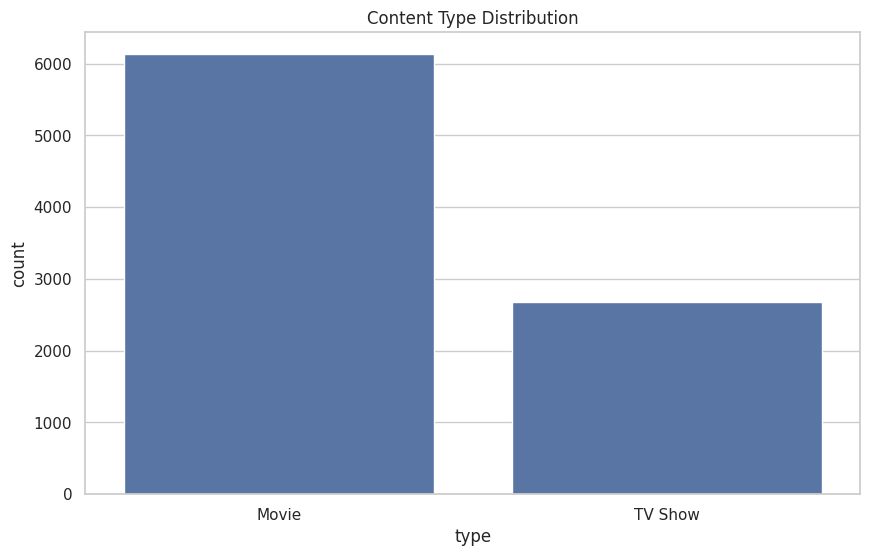

In [14]:
# to save as image
plt.figure()
sns.countplot(data = df, x = 'type')
plt.title('Content Type Distribution')
plt.savefig('content_type_distribution.png')

# Conclusion
In this EDA, we explored various aspects of Netflix's content — including type distribution, content addition trends, country-wise contribution, ratings, and genres. This gives a solid foundation for further work like recommendation systems or dashboards.